In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
raw = pd.read_csv("traffic.csv",sep=';',decimal=",")
raw.head()

,zone,int,intmax,%,x,y,name
0,18,0,1800,0.00,436008.175535,4.472594e+06,SEPÚLVEDA ENTRADA CRUCE N-S
1,18,450,1500,30.00,436039.395885,4.472398e+06,C.FCO.J.JIMENEZ ENTRE BERLANAS-SEPULVEDA E-O
2,18,225,3300,6.82,436718.479420,4.472479e+06,CJAL. FCO.J. JIMENEZ O-E(A. MORAN-ALHAMBRA)
3,18,90,1500,6.00,436901.191979,4.472515e+06,C.FCO.J.JIMENEZ ENTRE HURTUMPASCUAL-ALHAMBRA E-O
4,18,315,1800,17.50,436809.282737,4.472418e+06,ALHAMBRA ENTRE C.FCO.J.MARTIN-C.POBLET N-S


In [84]:
traffic = raw[['zone', 'int', 'intmax', '%']]
# traffic.head()
traffic.describe()

,zone,int,intmax,%
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,33.425069,400.870799,1997.406887,20.485430
std,17.551021,447.134012,1207.979397,19.501071
min,4.000000,-1.000000,65.000000,-0.150000
25%,16.000000,114.000000,1200.000000,7.577500
50%,38.000000,260.000000,1575.000000,17.570000
75%,49.000000,540.000000,3000.000000,29.630000
max,60.000000,4920.000000,9000.000000,492.000000


## Number of stations per zone

In [85]:
zones = traffic.groupby('zone')
zones.size()

zone
4     177
8     157
11    248
16    366
17    127
18    272
24    117
27      6
35    115
36    161
38    221
39    241
40    124
47    193
48    149
49     86
50    252
54     65
55     31
56    209
57    147
58     12
59     89
60     65
dtype: int64

## % of occupation by zone (avg mean, non-weighted)

In [86]:
pcts = traffic[['zone','%']].groupby('zone').mean()
pcts
pcts.sort_values(by=['%'],ascending=False).head()

,%
zone,
49,37.016047
8,34.633439
48,32.600000
54,31.984615
55,29.491613


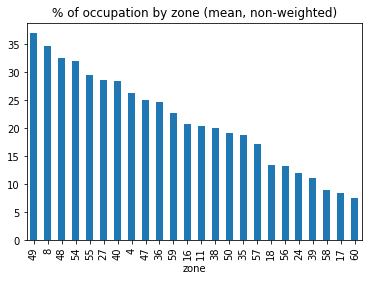

In [87]:
# my_plot = pcts.plot(kind='bar')
my_plot = pcts.sort_values(by=['%'],ascending=False).plot(kind='bar',legend=None,title='% of occupation by zone (mean, non-weighted)')

In [88]:
distrib = traffic[['zone','intmax']].groupby('zone').median()
distrib.sort_values(by=['intmax'],ascending=False).head()

,intmax
zone,
17,3000
39,2800
50,2200
49,1975
38,1900


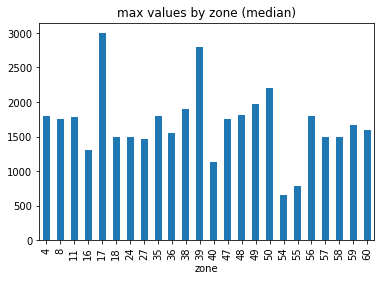

In [89]:
ordered = distrib.sort_values(by=['intmax'],ascending=False);
my_plot = distrib.plot(kind='bar',legend=None,title='max values by zone (median)')

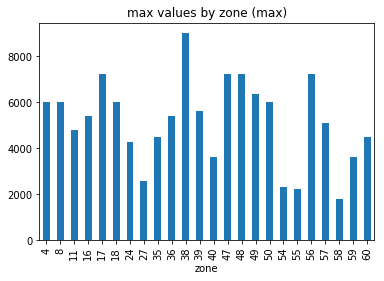

In [90]:
distrib = traffic[['zone','intmax']].groupby('zone').max()
ordered = distrib.sort_values(by=['intmax'],ascending=False);
my_plot = distrib.plot(kind='bar',legend=None,title='max values by zone (max)')

## Histograms with intmax and % values

To consider weighting % values by intmax.

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


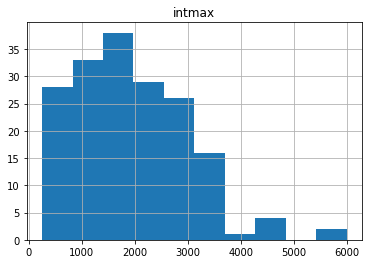

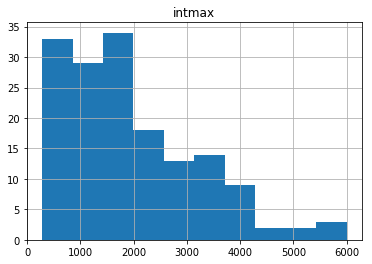

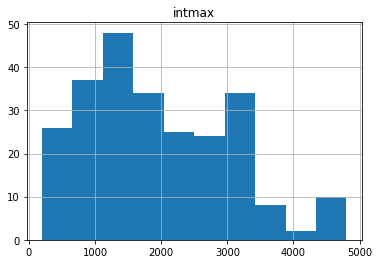

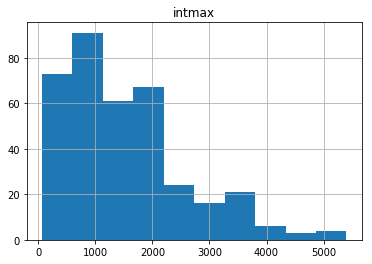

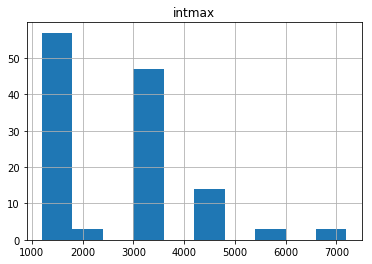

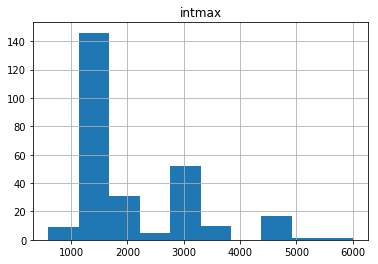

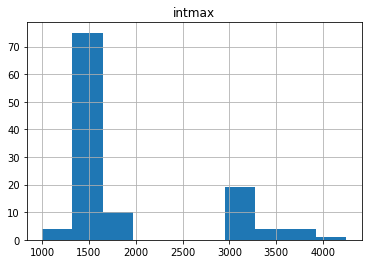

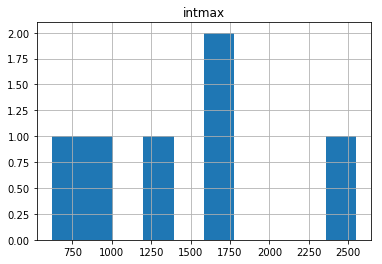

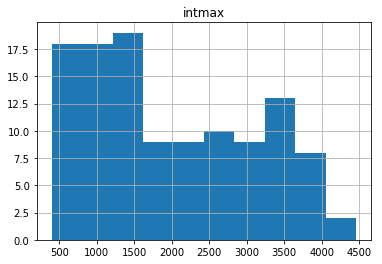

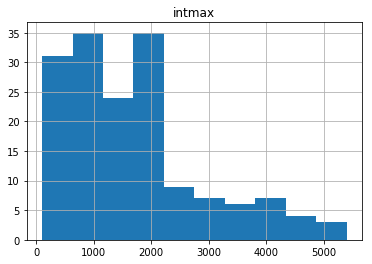

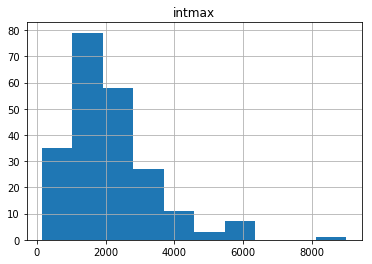

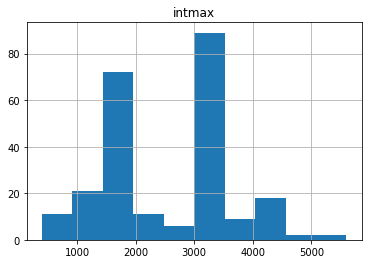

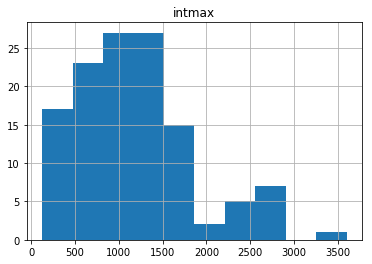

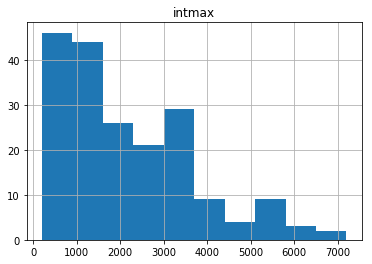

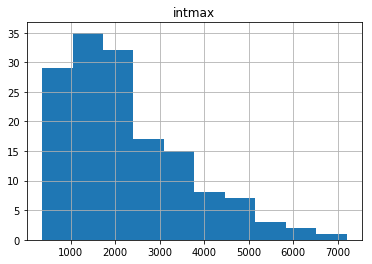

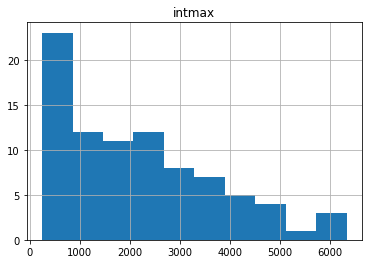

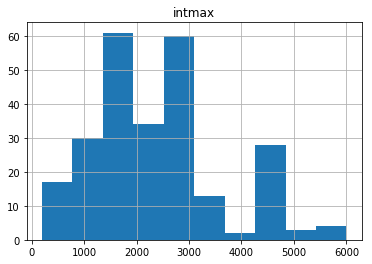

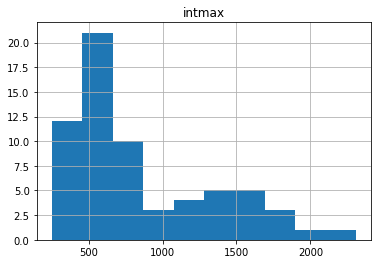

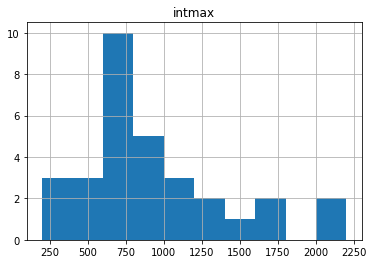

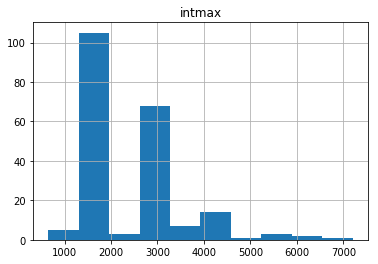

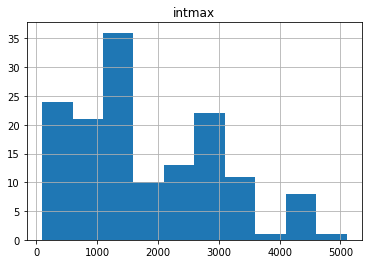

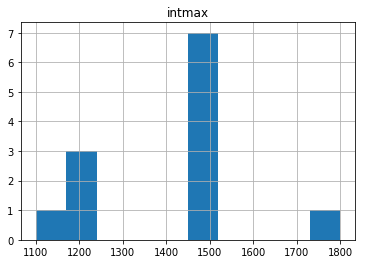

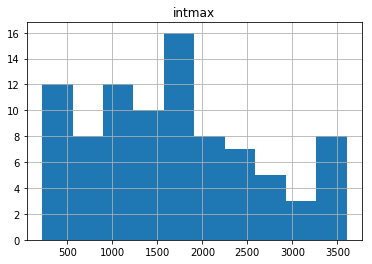

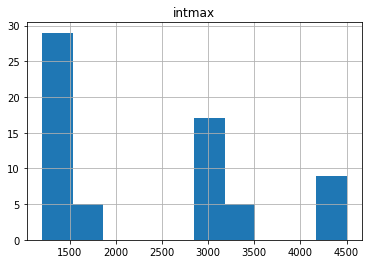

In [91]:
for i,z in enumerate(zones['zone'].groups.keys()):
    t = traffic[traffic['zone'] == z]
    t.hist(column='intmax')

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


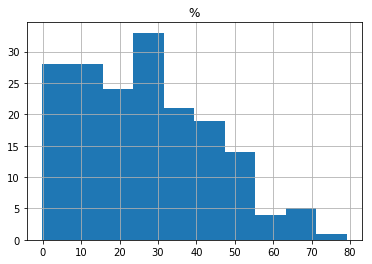

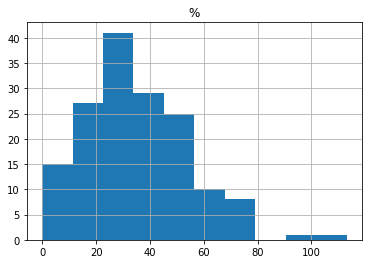

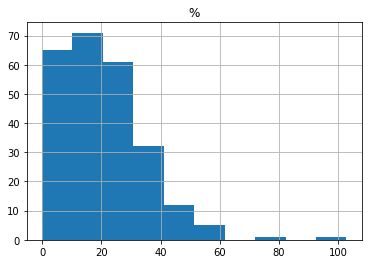

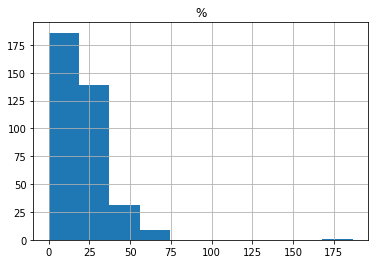

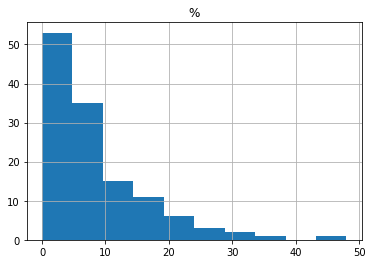

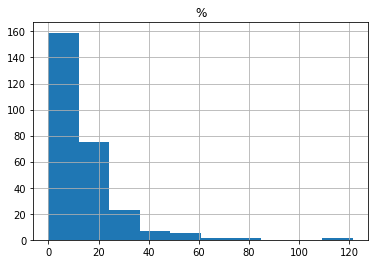

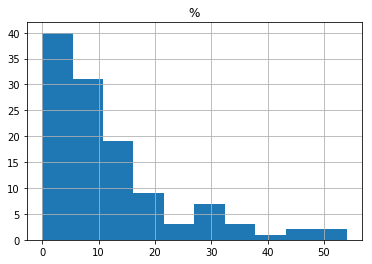

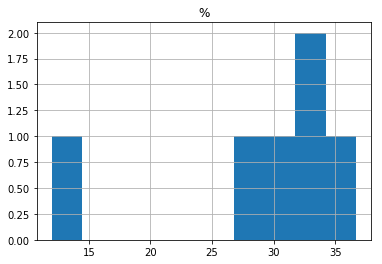

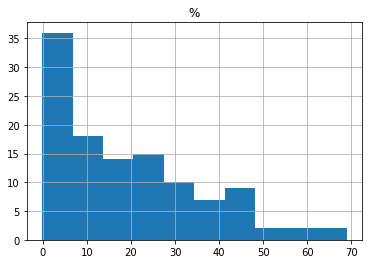

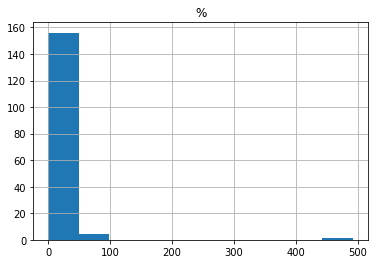

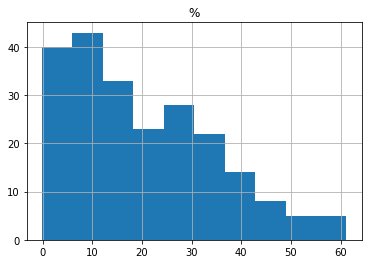

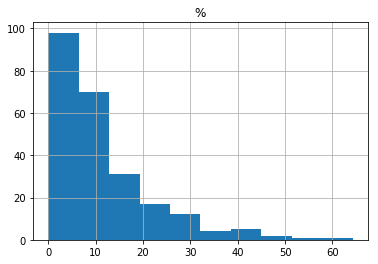

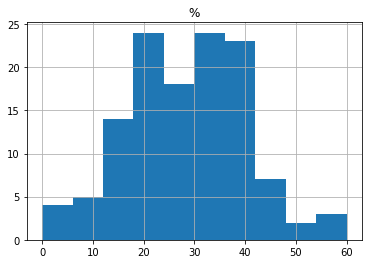

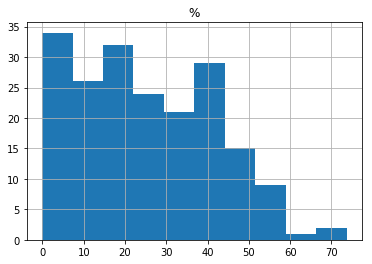

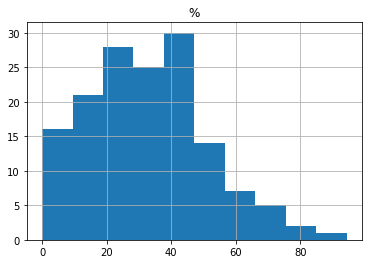

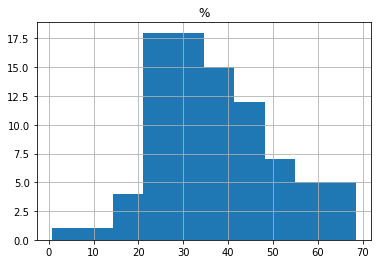

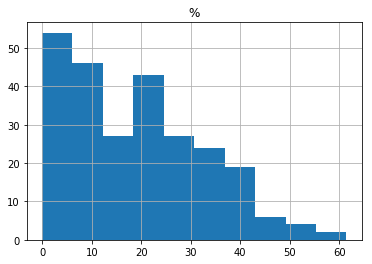

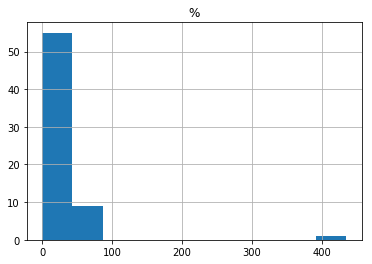

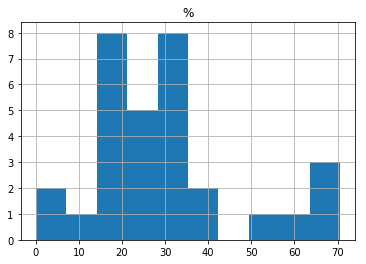

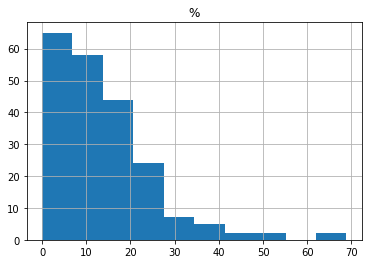

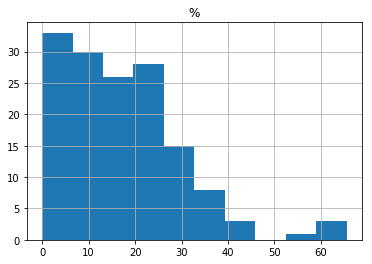

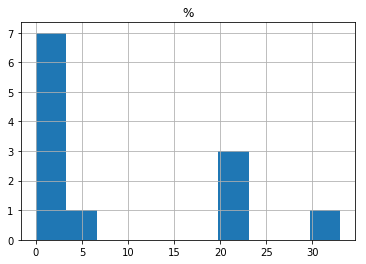

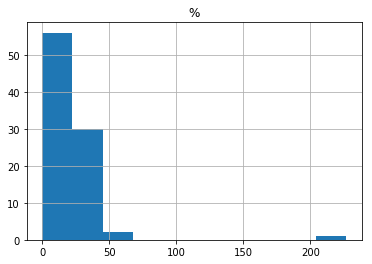

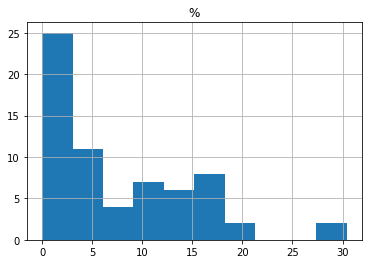

In [92]:
for i,z in enumerate(zones['zone'].groups.keys()):
    t = traffic[traffic['zone'] == z]
    t.hist(column='%')
#     if(i>5): break;